In [29]:
# Import Dependencies
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sqlalchemy import create_engine

engine = create_engine('postgresql://postgres:@localhost:5432/employee_db')
connection = engine.connect()

In [30]:
# import Employees table
emp_df = pd.read_sql("select * from \"employees\"", connection)
emp_df.fillna("NaN")
emp_df.head(10)


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993


In [31]:
# Import Salary Table
salary_df = pd.read_sql("select * from \"salaries\"", connection)
salary_df.fillna("NaN")
salary_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [32]:
# Import Department Table
dept_df = pd.read_sql("select * from \"department\"", connection)
dept_df.fillna("NaN")
dept_df.head(10)

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [33]:
# Import titles table
titles_df = pd.read_sql("select * from \"titles\"", connection)
# rename the column title_id so when we merge, we can use the column
titles_df = titles_df.rename(columns = {"title_id": "emp_title_id"})
titles_df.fillna("NaN")
titles_df.head(10)

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [34]:
# Import Department Manager table
dept_mgr_df = pd.read_sql("select * from \"dept_manager\"", connection)
dept_mgr_df.fillna("NaN")
dept_mgr_df.head(10)

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183
5,d003,110228
6,d004,110303
7,d004,110344
8,d004,110386
9,d004,110420


In [35]:
# Import department Employees
dept_emp_df = pd.read_sql("select * from \"dept_employee\"", connection)
dept_emp_df.fillna("NaN")
dept_emp_df.head(10)

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
5,10006,d005
6,10007,d008
7,10008,d005
8,10009,d006
9,10010,d004


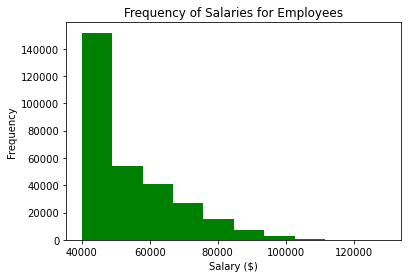

In [36]:
# Create a histogram to visualize the most common salary ranges for employees
plt.hist( x = salary_df['salary'], color= "Green")
plt.title("Frequency of Salaries for Employees")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.show()

In [37]:
# Create a bar chart of average salary by title
# merge title df with employees df then merge the new df with salary df
merge_df = pd.merge(titles_df, emp_df, on = "emp_title_id")
merge_df = pd.merge(merge_df, salary_df, on = "emp_no")
merge_df.head()

,emp_title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,s0001,Staff,421786,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
2,s0001,Staff,273487,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
3,s0001,Staff,246449,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084
4,s0001,Staff,48085,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016


In [38]:
# group by the title and calculate avg salary
avg_salary_titles = merge_df.groupby(["title"])["salary"].mean()
avg_salary_titles.head(10)

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

<AxesSubplot:xlabel='title'>

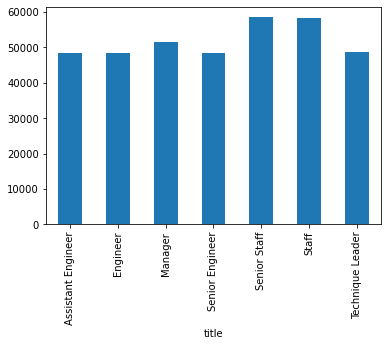

In [41]:
# Create a bar graph to show average salaries by titles.

avg_salary_titles.plot.bar()




# plt.bar(titles_df['title'], merge_df)
# plt.xticks(rotation="45")
# plt.title("Average Employee Salary by Title")
# plt.xlabel("Title")
# plt.ylabel("Average Salary ($)")

In [42]:
# Close the database connection
connection.close();